### Scheduler ALPACA
- initialise planning
- initialise instruments

In [2]:
from ciboulette.base.ciboulette import Ciboulette
from ciboulette.utils.planning import Planning
from ciboulette.phd2client.guider import Guider
from alpaca import Camera, FilterWheel, Telescope

- All equipment connected and functional on the host server
- Telescope mount initialized
- SynScan Pro App server connected and initialised
- Alpaca server started

In [3]:
cbl = Ciboulette()
cbl.serverport = {'SVR': '192.168.1.18', 'PORT': 11111} 
cbl.site = {"LAT": 49.51,"LONG": -0.21,"ELEV": 100}
cbl.atik383L
cbl.samyang85_1_4
cbl.filtername = 'L'

In [4]:
ccd = Camera(cbl.serverport,cbl.device)

In [5]:
fw = FilterWheel(cbl.serverport,cbl.device)

In [6]:
pg = Planning(idgoogledrive='1Yc-QxFr9veMeGjqvedRMrcEDL2GRyTS_')

In [7]:
guider = Guider(cbl.server)
#guider.Connect()
#guider.ConnectEquipment("asi120")

### Scheck

In [8]:
cbl.header.pprint(max_width = 255),
#fw.names(),
pg.header.pprint(max_width = 255),
pg.observations.pprint(max_width = 255)

API        SERVER       DEVICE FOCAL DIAM SITE_LAT SITE_LONG SITE_ELEV  INSTRUME  NAXIS1 NAXIS2 BINXY PIXELXY FILTER     NAME     OBSERVER DATASET     ARCHIVES      RA DEC  OBJECT
---- ------------------ ------ ----- ---- -------- --------- --------- ---------- ------ ------ ----- ------- ------ ------------ -------- ------- ---------------- --- ---- ------
2000 192.168.1.18:11111      0    85   60    49.51     -0.21     100.0 Atik 383L+   3326   2504     1     5.4      L CIBOULETTE-A     CAM1 dataset dataset/archives 0.0 90.0   INIT
 Title   Number Init  Go Slew Filter Guider Focus   Exposures   Duration
-------- ------ ---- --- ---- ------ ------ ----- ------------- --------
Planning      4  900   1    3      3      3     0  60 30 60 300 0.386111
target_name s_ra s_dec t_exptime  obs_id  binning filters dataproduct_type      obs_title      obs_collection instrument_name    proposal_pi    moon
----------- ---- ----- --------- -------- ------- ------- ---------------- -----------------

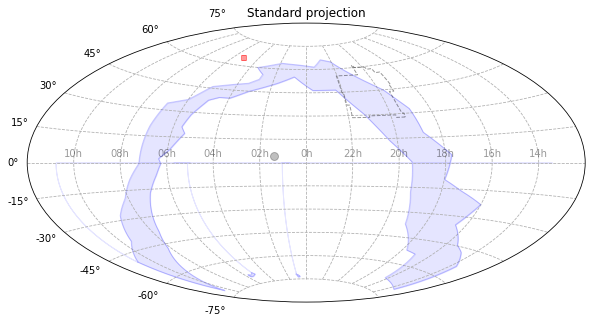

In [10]:
plan = pg.observations[3]
ra,dec = pg.coordinates(plan)
cbl.coordinates = {"RA": ra, "DEC": dec}
cbl.projections

### Launch

In [11]:
""" Optional, opening and configuration of the observatory """
#pg.sched_init
cbl.positionsbyname = 'Alp Boo'
#cbl.synctocoordinates(telescope)
""" -------------------------------------------------------"""
for plan in pg.observations:
    
    print(plan)
    pg.sched_go
    """ Mount """
    ra,dec = pg.coordinates(plan)
    cbl.coordinates = {"RA": ra, "DEC": dec}
    #cbl.slewtocoordinates(telescope)  
    pg.sched_slew
    """ FilterWheel """
    cbl.filtername = pg.filtername(plan)
    #cbl.filterwheel(fw)
    pg.sched_filter
    """ START Guider """
    #guider.Guide(2.0, 10.0, 100.0)
    pg.sched_guider
    """ Focus """
    pg.sched_focus
    """ CCD """
    cbl.exposure = pg.exposure(plan)
    #cbl.camera(ccd)    
    """ STOP Guider """
    #guider.StopCapture() 

target_name s_ra s_dec t_exptime obs_id binning filters dataproduct_type obs_title obs_collection instrument_name    proposal_pi    moon
----------- ---- ----- --------- ------ ------- ------- ---------------- --------- -------------- --------------- ----------------- ----
    SECTOR1  5.3  73.9        60      1       1     CLS        intensity      none        science    ciboulette-A dtouzan@gmail.com   75
target_name s_ra s_dec t_exptime obs_id binning filters dataproduct_type obs_title obs_collection instrument_name    proposal_pi    moon
----------- ---- ----- --------- ------ ------- ------- ---------------- --------- -------------- --------------- ----------------- ----
    SECTOR1  5.3  70.9        30      2       1    OIII        intensity      none            UT1    ciboulette-A dtouzan@gmail.com   75
target_name s_ra s_dec t_exptime obs_id binning filters dataproduct_type      obs_title      obs_collection instrument_name    proposal_pi    moon
----------- ---- ----- --------